In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

health_df = pd.read_csv("../Input/Health_13100458.csv")
health_df.head()


,REF_DATE,GEO,DGUID,Sex,Aboriginal identity,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007/2010,Canada,NaN,Both sexes,Total population,Arthritis,Age-standardized rate,Rate,257,units,0,v65335813,1.1.1.1.1,12.1,NaN,NaN,NaN,1
1,2007/2010,Canada,NaN,Both sexes,Total population,Arthritis,"Low 95% confidence interval, age-standardized ...",Rate,257,units,0,v65335814,1.1.1.1.2,12.0,NaN,NaN,NaN,1
2,2007/2010,Canada,NaN,Both sexes,Total population,Arthritis,"High 95% confidence interval, age-standardized...",Rate,257,units,0,v65335815,1.1.1.1.3,12.3,NaN,NaN,NaN,1
3,2007/2010,Canada,NaN,Both sexes,Total population,Arthritis,Coefficient of variation for age-standardized ...,Rate,257,units,0,v65335816,1.1.1.1.4,0.7,NaN,NaN,NaN,1
4,2007/2010,Canada,NaN,Both sexes,Total population,Asthma,Age-standardized rate,Rate,257,units,0,v65335833,1.1.1.2.1,8.7,NaN,NaN,NaN,1


In [4]:
# Create a new table that takes the Aboriginal Identity data and all the columns relating to geo and health
health_indicators_table = health_df[["GEO", "Sex", 
                                     "Aboriginal identity", "Indicators", "Characteristics", "VALUE"]]
health_indicators_table.head()

,GEO,Sex,Aboriginal identity,Indicators,Characteristics,VALUE
0,Canada,Both sexes,Total population,Arthritis,Age-standardized rate,12.1
1,Canada,Both sexes,Total population,Arthritis,"Low 95% confidence interval, age-standardized ...",12.0
2,Canada,Both sexes,Total population,Arthritis,"High 95% confidence interval, age-standardized...",12.3
3,Canada,Both sexes,Total population,Arthritis,Coefficient of variation for age-standardized ...,0.7
4,Canada,Both sexes,Total population,Asthma,Age-standardized rate,8.7


In [5]:
First_Nations_df = health_indicators_table.loc[health_indicators_table["Characteristics"] == 'Age-standardized rate']
First_Nations_df_sex = First_Nations_df.loc[health_indicators_table["Sex"] == 'Both sexes']
First_Nations_df_sex_drink = First_Nations_df_sex.loc[health_indicators_table["Indicators"] == "5 or more drinks on one occasion, at least once a month in the past year"]
First_Nations_df_sex_drink.head()


,GEO,Sex,Aboriginal identity,Indicators,Characteristics,VALUE
68,Canada,Both sexes,Total population,"5 or more drinks on one occasion, at least onc...",Age-standardized rate,18.8
224,Canada,Both sexes,First Nations,"5 or more drinks on one occasion, at least onc...",Age-standardized rate,26.5
380,Canada,Both sexes,Métis,"5 or more drinks on one occasion, at least onc...",Age-standardized rate,26.6
536,Canada,Both sexes,Inuit,"5 or more drinks on one occasion, at least onc...",Age-standardized rate,26.2
692,Canada,Both sexes,Non-Aboriginal identity population,"5 or more drinks on one occasion, at least onc...",Age-standardized rate,18.5


In [6]:
clean_drinking=First_Nations_df_sex_drink[["GEO", "Aboriginal identity", "VALUE"]]
pivoted = clean_drinking.pivot_table(index=["GEO"], columns="Aboriginal identity", values="VALUE").reset_index()
pivoted_clean_drinking=pivoted[["GEO", "First Nations", "Non-Aboriginal identity population"]]
pivoted_clean_drinking_droped=pivoted_clean_drinking.dropna(subset=["First Nations"])
pivoted_clean_drinking_droped

Aboriginal identity,GEO,First Nations,Non-Aboriginal identity population
0,Alberta,32.1,19.9
1,British Columbia,23.3,16.7
2,Canada,26.5,18.5
3,Manitoba,27.4,19.2
4,New Brunswick,24.7,21.7
5,Newfoundland and Labrador,29.2,26.1
6,Northwest Territories,35.9,28.2
7,Nova Scotia,19.4,22.3
9,Ontario,26.6,17.2
11,Quebec,21.3,19.5


In [9]:
geo_list_FN=list(pivoted_clean_drinking_droped["GEO"])
geo_list_FN

['Alberta',
 'British Columbia',
 'Canada',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Quebec',
 'Saskatchewan',
 'Yukon']

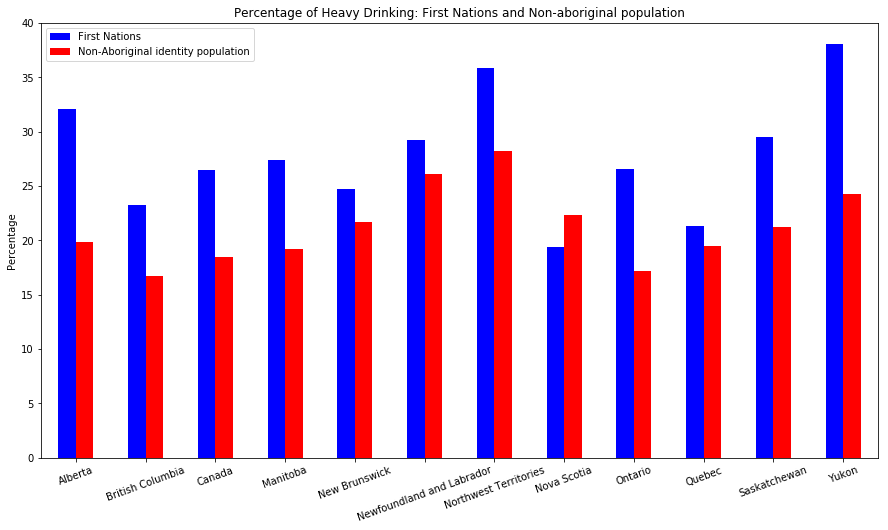

In [13]:
colors=["b","r"]
drinking_chart=pivoted_clean_drinking_droped.plot(kind="bar", figsize=(15,8), color=colors)
x_axis = np.arange(len(geo_list_FN))
plt.xticks(x_axis,geo_list_FN, rotation=20)
plt.title("Percentage of Heavy Drinking: First Nations and Non-aboriginal population")
plt.ylabel ("Percentage")
plt.legend(loc='upper left')
fig_path="../Output/Percentage_drinking_all_provinces.png"
plt.savefig(fig_path)
plt.show()

In [14]:
geo_list=list(pivoted_clean_drinking["GEO"])
geo_list

['Alberta',
 'British Columbia',
 'Canada',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Yukon']

In [15]:
drinking_Inuit=pivoted.dropna(subset=["Inuit"])
drinking_Inuit_clean=drinking_Inuit[["GEO", "First Nations","Inuit","Non-Aboriginal identity population"]]
drinking_Inuit_clean

Aboriginal identity,GEO,First Nations,Inuit,Non-Aboriginal identity population
2,Canada,26.5,26.2,18.5
5,Newfoundland and Labrador,29.2,33.8,26.1
6,Northwest Territories,35.9,35.1,28.2
8,Nunavut,NaN,16.9,23.8


In [16]:
geo_list2=list(drinking_Inuit_clean["GEO"])
geo_list2

['Canada', 'Newfoundland and Labrador', 'Northwest Territories', 'Nunavut']

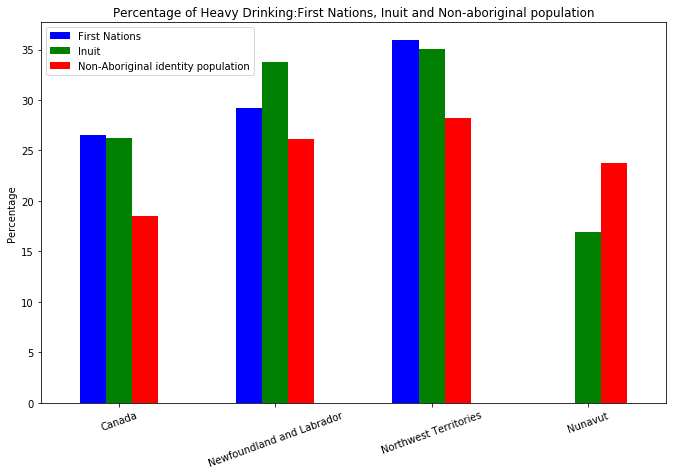

In [17]:
colors2=["b","g","r"]
drinking_chart_Inuit=drinking_Inuit_clean.plot(kind="bar", figsize=(11.2,7), color=colors2)
x_axis = np.arange(len(geo_list2))
plt.xticks(x_axis,geo_list2, rotation=20)
plt.title("Percentage of Heavy Drinking:First Nations, Inuit and Non-aboriginal population")
plt.ylabel ("Percentage")
plt.legend(loc='upper left')
fig_path="../Output/Percentage_drinking_Inuit.png"
plt.savefig(fig_path)
plt.show()

In [18]:
drinking_Metis=pivoted.dropna(subset=["Métis"])
drinking_Metis
drinking_Metis_clean=drinking_Metis[["GEO", "First Nations","Métis","Non-Aboriginal identity population"]]
drinking_Metis_clean

Aboriginal identity,GEO,First Nations,Métis,Non-Aboriginal identity population
0,Alberta,32.1,31.9,19.9
1,British Columbia,23.3,23.4,16.7
2,Canada,26.5,26.6,18.5
3,Manitoba,27.4,32.2,19.2
5,Newfoundland and Labrador,29.2,21.0,26.1
6,Northwest Territories,35.9,29.1,28.2
7,Nova Scotia,19.4,30.3,22.3
9,Ontario,26.6,22.7,17.2
11,Quebec,21.3,18.2,19.5
12,Saskatchewan,29.5,23.6,21.2


In [19]:
geo_list3=list(drinking_Metis_clean["GEO"])
geo_list3

['Alberta',
 'British Columbia',
 'Canada',
 'Manitoba',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Quebec',
 'Saskatchewan',
 'Yukon']

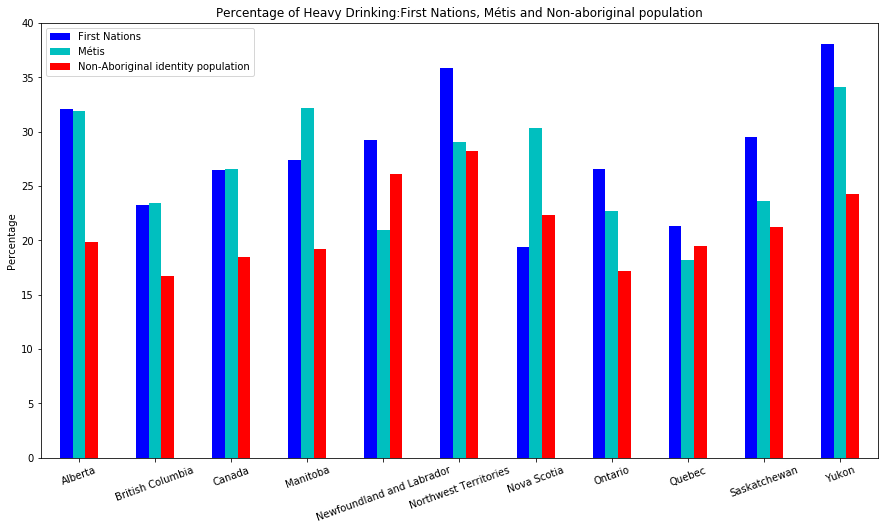

In [21]:
colors3=["b","c","r"]
drinking_chart_Metis=drinking_Metis_clean.plot(kind="bar", figsize=(15,8), color=colors3)
x_axis = np.arange(len(geo_list3))
plt.xticks(x_axis,geo_list3, rotation=20)
plt.title("Percentage of Heavy Drinking:First Nations, Métis and Non-aboriginal population")
plt.ylabel ("Percentage")
plt.legend(loc='upper left')
fig_path="../Output/Percentage_drinking_Metis.png"
plt.savefig(fig_path)
plt.show()